In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

### Compute co_occurrence matrix

In [3]:
# real data
file_real = "predictions_real.pkl"

# unmetered data mixed
file_100k = "predictions_100k_mixed_unmetered.pkl"
file_50k = "predictions_50k_mixed_unmetered.pkl"

# metered data


data = pd.read_pickle("./shared/to_vid/predictions/"+file_real)
label_names = pd.read_pickle("./Energy_graph/labeles.pkl")
co_occurrence_matrix = np.zeros((82, 82))
for d in data:
    y_test = d[1]
    y_pred_tf = d[0]
    # n_labels = y_test.shape[1]
    

    for true, pred in zip(y_test, y_pred_tf):
        fn_labels = np.where((true == 1) & (pred == 0))[0]  # False negatives
        fp_labels = np.where((true == 0) & (pred == 1))[0]  # False positives

        for fn in fn_labels:
            for fp in fp_labels:
                co_occurrence_matrix[fn, fp] += 1


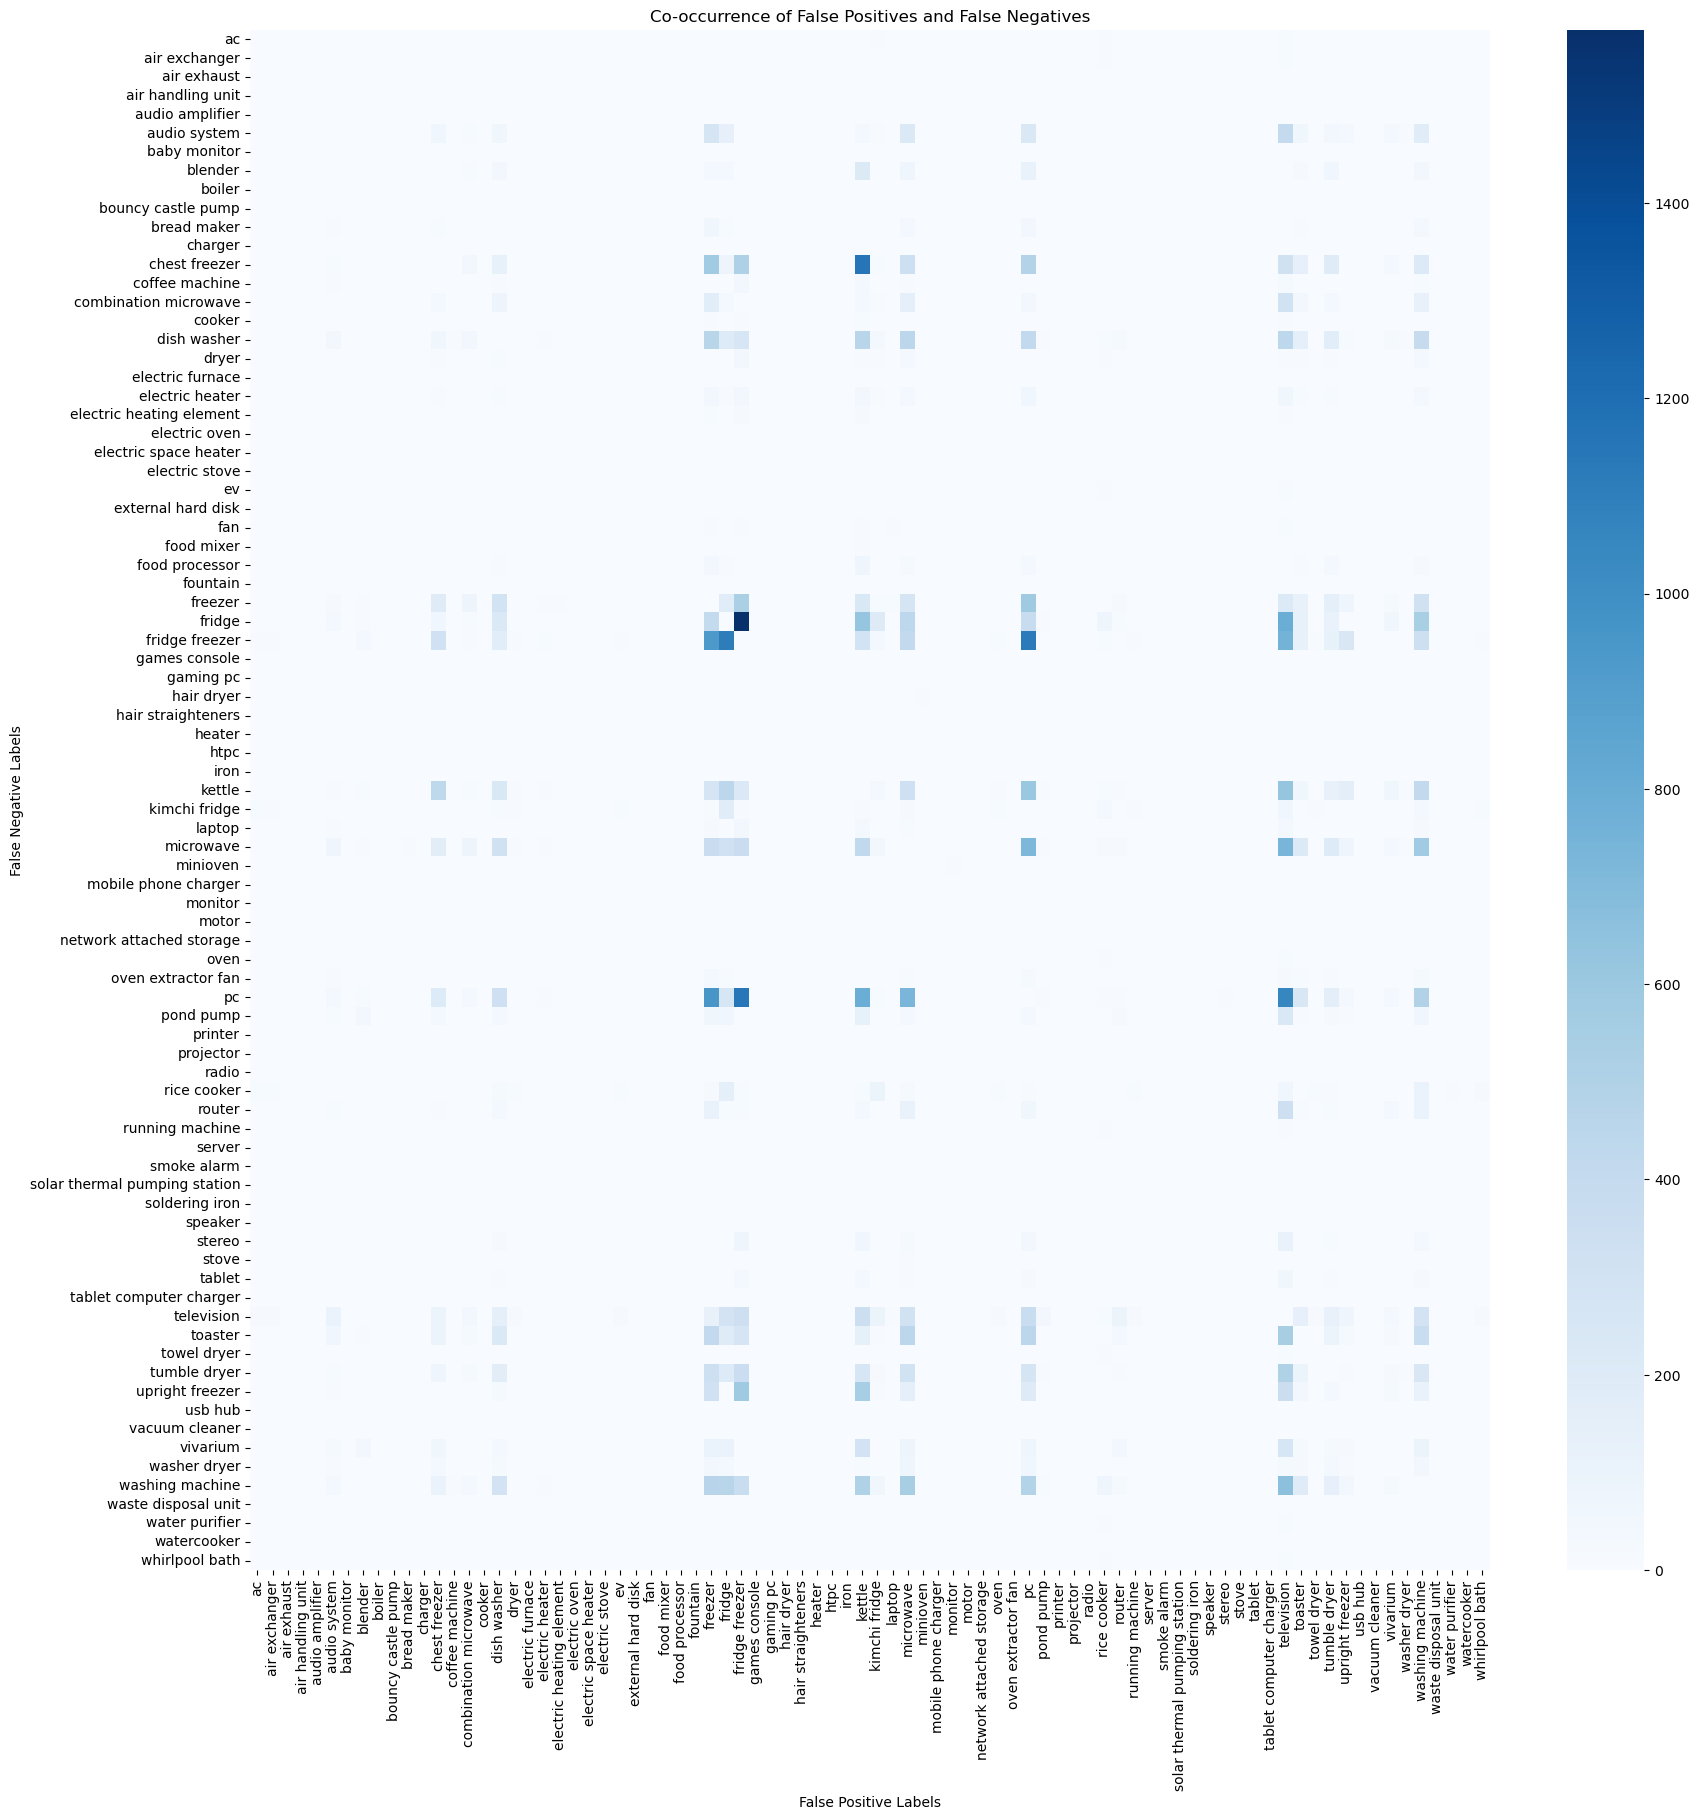

In [4]:

plt.figure(figsize=(20, 20))
sns.heatmap(co_occurrence_matrix, fmt='g', cmap='Blues')

plt.xticks(np.arange(len(label_names)) + 0.5, label_names, rotation=90)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names, rotation=0)
plt.xlabel('False Positive Labels')
plt.ylabel('False Negative Labels')
plt.title('Co-occurrence of False Positives and False Negatives')
plt.show()

### Get average missed devices the model predicted

In [5]:

count = []
for d in tqdm(data):
    y_test = d[1]
    y_pred_tf = d[0]
    for w in range(len(y_test)):
        # test = y_test[w].count(True)
        # pred = y_pred_tf[w].count(True)

        test = np.sum(y_test[w])
        pred = np.sum(y_pred_tf[w])

        c = test - pred
        count.append(c)
    
count = np.array(count)
print(f"Average wrong number of devices predicted: {count.mean()}")
print(f"Median wrong number of devices predicted: {np.median(count)}")


  0%|          | 0/5 [00:00<?, ?it/s]

Average wrong number of devices predicted: 0.2977728663719823
Median wrong number of devices predicted: 0.0
